**Problem Statement:**

Diabetes is a chronic disease that millions of people worldwide and can lead to severe heaalth complications if not diagnosed early.Medical factors such as glucose level,Body Mass Index(BMI),age,Bloodpresure,and insullin levels play a crucial role in determining diabetes risk.

# Objectives of the projects
* undestand the patterns related to diabetes occurence
* Perform basic data preprocessing
* Conduct minimal but meaningful Exploratory Data Analysis(EDA)
*Build classification based machine learning models
* Evaluate model performance using classification metrics
* Identify key medical features influencing diabetes prediction









In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


Load the dataset

In [ ]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Graph 1:Diabetes Outcome Distribution**

purpose:
* Understand class balance
* Identify imbalance between diabetic and non-diabetic patients

Graph:
Bar chart-Diabetes Outcome

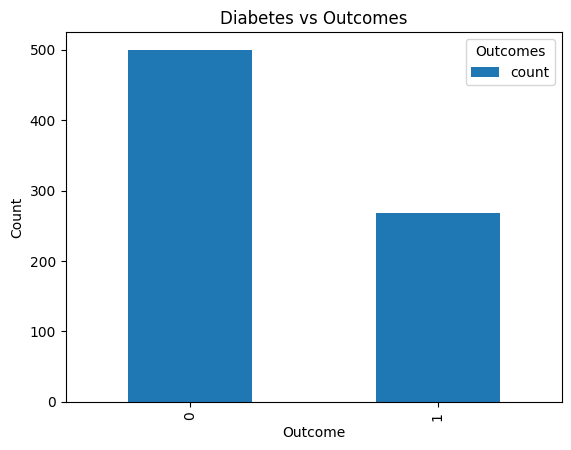

In [ ]:
#creating bar chart for the diabetes and outcomes
import pandas as pd
import matplotlib.pyplot as plt
counts = df['Outcome'].value_counts()
counts.plot(kind='bar')

plt.title("Diabetes vs Outcomes")
plt.xlabel("Outcome") # Changed from "Diabetes" to "Outcome" for clarity
plt.ylabel("Count")
plt.legend(title="Outcomes")
plt.show()

**Graph 2:Glucose Level vs Outcomes**

Purpose:

Analyze how glucose levels differ between diabetic and non-diabetic patients.


Graph:Box plot



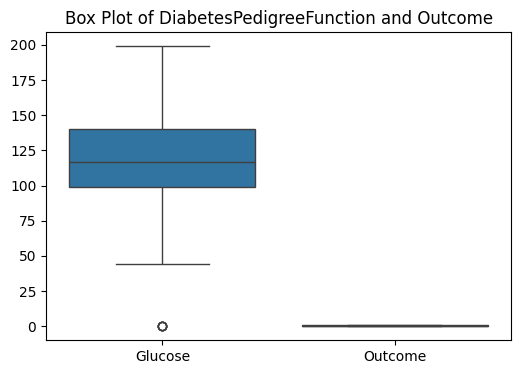

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Glucose', 'Outcome']])
plt.title('Box Plot of DiabetesPedigreeFunction and Outcome')
plt.show()


Graph 3:BMI VS Outcomes

Purpose:

Understand the impact of BMI on diabetic risk

Graph: Box plot

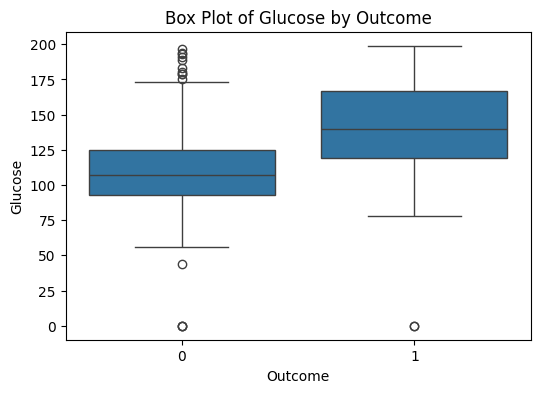

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)

plt.title('Box Plot of Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


**Graph 4:Age vs Outcome**

Purpose:
Analyze age-related diabetes trends

Graph:
Histogram or box plot



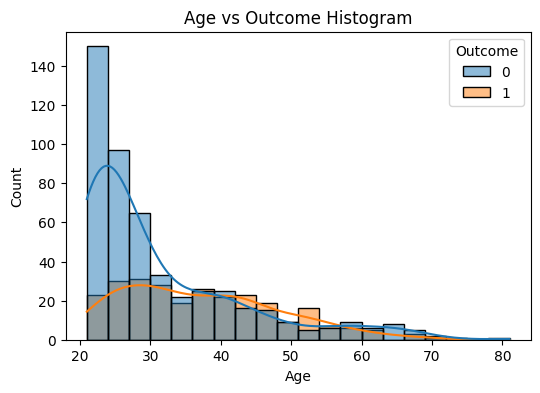

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Outcome', bins=20, kde=True)

plt.title('Age vs Outcome Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Handle the missing or zero values

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Split data into trainig and testing sets

In [ ]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_tarin,y_test=train_test_split(
    X,y,test_size=0.20,random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


*Logistic Regression-baseline classification model



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_tarin)

LogisticRegression(max_iter=1000)

In [ ]:

new_outcome=[X_test[0]]
predicted_price=model.predict(new_outcome)
print("predicted price",predicted_price[0])

predicted price 0


In [ ]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]


*Decision Tree classifier-captures non-linear decision
rules


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=2)
model_gini.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
print('The model was trained on these features:', X.columns.tolist())
# To make a prediction, you need to provide an array with 8 features.
# For example, using the first row of the original X data:
first_sample = X.iloc[0].values.reshape(1, -1)
print("gini prediction", model_gini.predict(first_sample))

The model was trained on these features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
gini prediction [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

*Random Forest Classifier-improves accuracy and feature importance



In [ ]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.3,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

**Metrics:**

*Accuracy

*Precision

*Recall

*F1-Score





In [ ]:
y_pred=model.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.7445887445887446


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
Y_actual=y_test
Y_pred=y_pred

In [ ]:
print("confusion matrix",confusion_matrix(Y_actual,Y_pred))
print("accuracy value",accuracy_score(Y_actual,Y_pred))
print("precision value",precision_score(Y_actual,Y_pred))
print("recall score",recall_score(Y_actual,Y_pred))
print("f1 score",f1_score(Y_actual,Y_pred))

confusion matrix [[131  20]
 [ 39  41]]
accuracy value 0.7445887445887446
precision value 0.6721311475409836
recall score 0.5125
f1 score 0.5815602836879432


**Graph 5:Confusion Matrix**

Purpose:

Visualize true positive,true negative,false positive,and false negetive

Graph:

Heatmap-Confusion Matrix








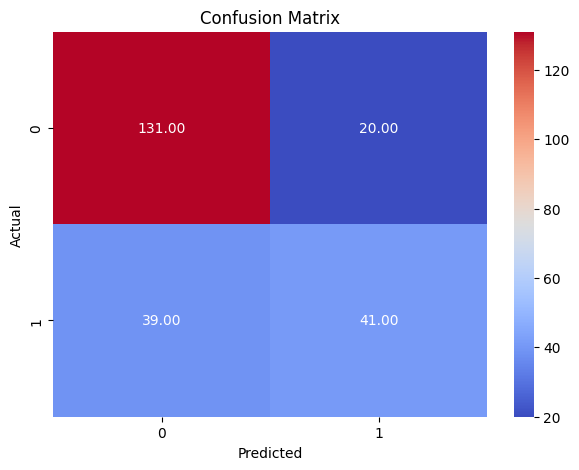

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_actual,Y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Confusion Matrix") # Changed title for clarity
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Graph 6:Feature Importance(random forest) **

Purpose:
identify the most influential medical attributes affecting diabetes prediction

Graph:
Bar chart-Feature importance

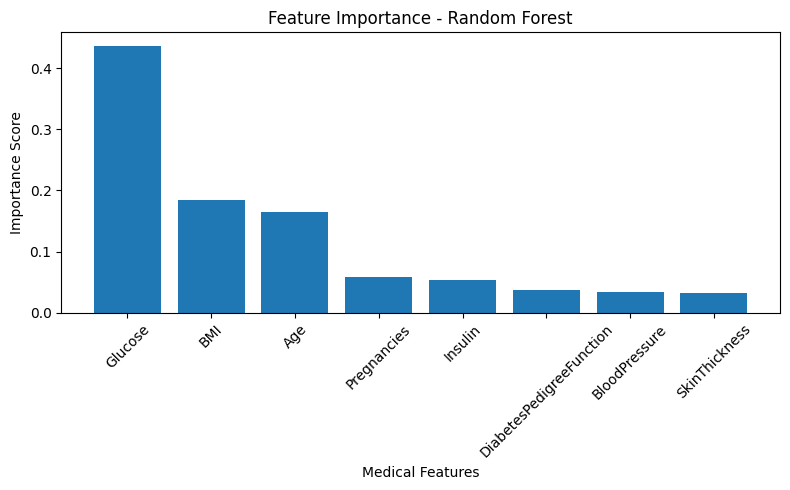

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from already trained model
importances = model.feature_importances_
features = X.columns  # or x.columns (whichever you used)

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot Bar Chart
plt.figure(figsize=(8,5))
plt.bar(feature_importance_df["Feature"],
        feature_importance_df["Importance"])

plt.xticks(rotation=45)
plt.xlabel("Medical Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


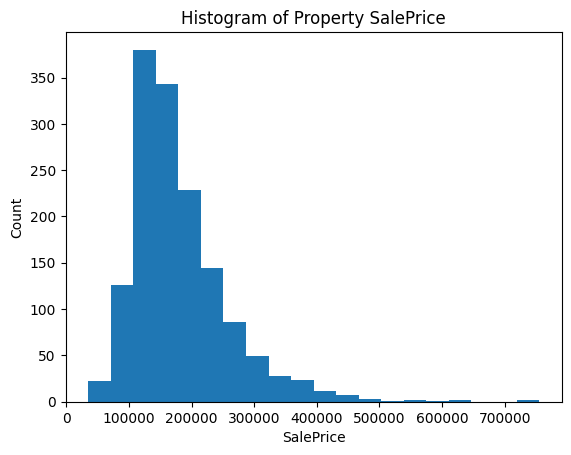

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], bins=20)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Histogram of Property SalePrice')
plt.show()


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

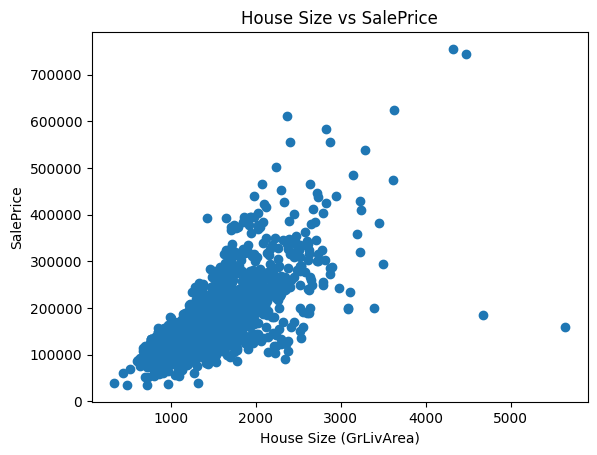

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('House Size (GrLivArea)')
plt.ylabel('SalePrice')
plt.title('House Size vs SalePrice')
plt.show()

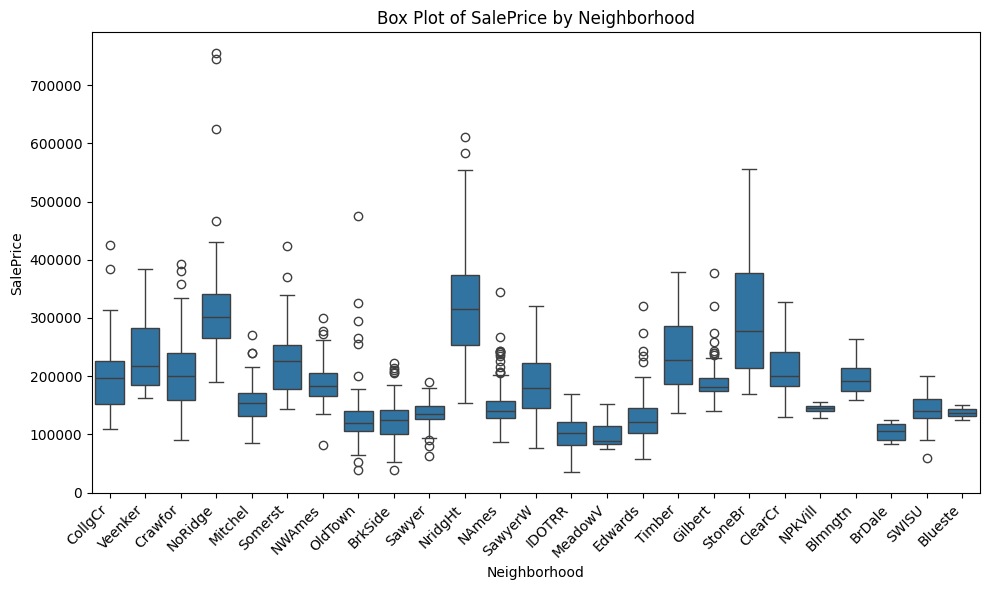

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6)) # Increased figure size for better readability
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)

plt.title('Box Plot of SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

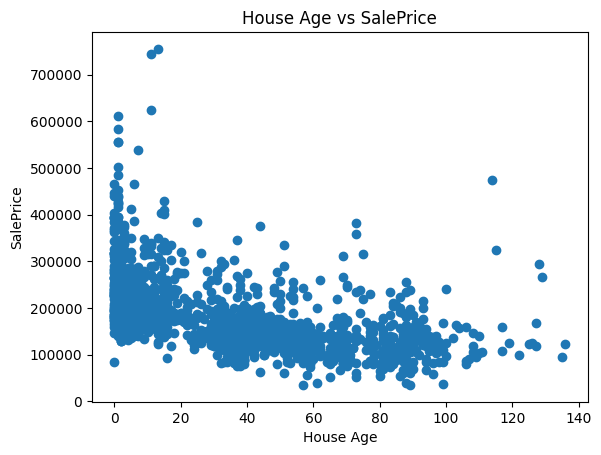

In [ ]:
import matplotlib.pyplot as plt

# Calculate HouseAge from existing columns
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

plt.scatter(df['HouseAge'], df['SalePrice'])
plt.xlabel('House Age')
plt.ylabel('SalePrice')
plt.title('House Age vs SalePrice')
plt.show()

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
import pandas as pd
import numpy as np

# 1️⃣ Select required columns
df_clean = df[['Id', 'GrLivArea', 'Neighborhood', 'YearBuilt',
               'YrSold', 'OverallCond', 'BedroomAbvGr',
               'FullBath', 'SalePrice']]

# 2️⃣ Rename columns
df_clean = df_clean.rename(columns={
    'Id': 'id',
    'GrLivArea': 'size',
    'Neighborhood': 'location',
    'OverallCond': 'condition',
    'BedroomAbvGr': 'bedrooms',
    'FullBath': 'bathrooms',
    'SalePrice': 'price'
})

# 3️⃣ Create age column
df_clean['age'] = df_clean['YrSold'] - df_clean['YearBuilt']

# Drop unnecessary columns
df_clean.drop(columns=['YearBuilt', 'YrSold'], inplace=True)

# 4️⃣ Handle Missing Values
# Numerical columns → fill with median
num_cols = ['size', 'condition', 'bedrooms', 'bathrooms', 'price', 'age']
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Categorical column → fill with mode
df_clean['location'].fillna(df_clean['location'].mode()[0], inplace=True)

# 5️⃣ Remove Duplicates
df_clean.drop_duplicates(inplace=True)

# 6️⃣ Fix Data Types (if needed)
df_clean['bedrooms'] = df_clean['bedrooms'].astype(int)
df_clean['bathrooms'] = df_clean['bathrooms'].astype(int)
df_clean['condition'] = df_clean['condition'].astype(int)

# 7️⃣ Remove Outliers (IQR Method for price)
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[(df_clean['price'] >= Q1 - 1.5 * IQR) &
                    (df_clean['price'] <= Q3 + 1.5 * IQR)]

# 8️⃣ Encode location (if using for ML)
df_clean = pd.get_dummies(df_clean, columns=['location'], drop_first=True)

# Final cleaned dataset
df_clean.head()


/tmp/ipython-input-1240607089.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['location'].fillna(df_clean['location'].mode()[0], inplace=True)


,id,size,condition,bedrooms,bathrooms,price,age,location_Blueste,location_BrDale,location_BrkSide,...,location_NoRidge,location_NridgHt,location_OldTown,location_SWISU,location_Sawyer,location_SawyerW,location_Somerst,location_StoneBr,location_Timber,location_Veenker
0,1,1710,5,3,2,208500,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1262,8,3,2,181500,31,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,1786,5,3,2,223500,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1717,5,3,1,140000,91,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,2198,5,4,2,250000,8,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# 1️⃣ Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 2️⃣ Define Features (X) and Target (y)
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Create Model
model = LinearRegression()

# 5️⃣ Train Model
model.fit(X_train, y_train)

# 6️⃣ Make Predictions
y_pred = model.predict(X_test)

# 7️⃣ Model Evaluation

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 19807.018045940767
Mean Squared Error (MSE): 671581280.7961242
Root Mean Squared Error (RMSE): 25914.885313196435
R2 Score: 0.7888651887669236


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest R2 Score: 0.8000835364593821
